In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [50]:
df = pd.read_csv('Synthetic_Transportation_Dataset_Expanded_v2.csv')
df

,Record_ID,Timestamp,Latitude,Longitude,Road_ID,Vehicle_Count,Avg_Speed(km/h),Vehicle_Type,Traffic_Density,Weather,Visibility(m),Road_Condition,Accident_Occurred,Accident_Severity,Alert_Generated,temperature,humidity
0,1,03-10-2023 09:50,32.004714,76.971961,RD-285,419,90,Mixed,Medium,Fog,5663,Under Maintenance,Yes,Major,Yes,31.24,61.12
1,2,09-06-2019 08:01,10.632732,77.828652,RD-384,232,104,Mixed,Very High,Rain,896,Wet,No,-,No,48.52,33.07
2,3,08-01-2020 01:38,12.258165,88.810189,RD-282,339,100,Bus,Medium,Storm,9369,Under Maintenance,No,-,No,41.96,43.97
3,4,18-10-2022 05:43,34.289950,95.415253,RD-128,74,63,Car,Low,Clear,2510,Slippery,Yes,Fatal,No,37.96,59.52
4,5,29-06-2023 23:11,31.698993,77.675486,RD-49,187,73,Mixed,Low,Storm,3447,Wet,No,-,No,24.68,48.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,29-06-2018 00:52,26.411744,89.346236,RD-186,489,73,Bike,Medium,Storm,5256,Under Maintenance,No,-,No,30.01,51.57
5496,5497,23-04-2019 23:23,22.836886,76.580499,RD-442,18,66,Bus,High,Storm,9625,Dry,No,-,No,37.38,85.60
5497,5498,23-12-2022 05:35,17.626293,74.393270,RD-390,433,81,Bike,Very High,Rain,1746,Dry,No,-,No,46.67,71.92
5498,5499,18-01-2019 19:05,10.919562,72.990183,RD-277,251,63,Car,Medium,Snow,7601,Under Maintenance,No,-,No,37.08,45.43


In [51]:
df.isnull().sum()

,0
Record_ID,0
Timestamp,0
Latitude,0
Longitude,0
Road_ID,0
Vehicle_Count,0
Avg_Speed(km/h),0
Vehicle_Type,0
Traffic_Density,0
Weather,0


In [52]:
df.duplicated().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record_ID          5500 non-null   int64  
 1   Timestamp          5500 non-null   object 
 2   Latitude           5500 non-null   float64
 3   Longitude          5500 non-null   float64
 4   Road_ID            5500 non-null   object 
 5   Vehicle_Count      5500 non-null   int64  
 6   Avg_Speed(km/h)    5500 non-null   int64  
 7   Vehicle_Type       5500 non-null   object 
 8   Traffic_Density    5500 non-null   object 
 9   Weather            5500 non-null   object 
 10  Visibility(m)      5500 non-null   int64  
 11  Road_Condition     5500 non-null   object 
 12  Accident_Occurred  5500 non-null   object 
 13  Accident_Severity  5500 non-null   object 
 14  Alert_Generated    5500 non-null   object 
 15  temperature        5500 non-null   float64
 16  humidity           5500 

,Record_ID,Latitude,Longitude,Vehicle_Count,Avg_Speed(km/h),Visibility(m),temperature,humidity
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,2750.500000,22.572905,82.476797,254.092364,61.324909,5046.928364,34.903933,59.617035
std,1587.857571,8.356760,8.356606,141.397428,33.207133,2806.171704,8.674031,17.155972
min,1.000000,8.000245,68.007834,10.000000,5.000000,201.000000,20.000000,30.000000
25%,1375.750000,15.480326,75.370574,131.000000,33.000000,2640.000000,27.400000,44.800000
50%,2750.500000,22.616598,82.322999,255.000000,60.000000,5007.000000,34.935000,59.510000
75%,4125.250000,29.930907,89.738211,377.250000,90.000000,7515.000000,42.382500,74.292500
max,5500.000000,36.998251,96.991006,499.000000,119.000000,9998.000000,49.990000,89.980000


In [53]:
target='Accident_Occurred'
df_clean = df.copy()
X = df_clean.drop(target,axis= 1)
y = df_clean[target].map({'Yes':1 , 'No':0})
y = y.astype(int)

In [54]:
X_train ,X_test , y_train , y_test =train_test_split(X ,y , test_size = 0.2 , random_state =42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [55]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], errors = 'coerce')

In [56]:
df['Accident_Severity'] = df['Accident_Severity'].replace('-' ,'None')


In [57]:
def iqr_handler(df , columns):

    for col in columns:
        df_clean = df.copy()
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df_clean = df_clean[(df_clean[col]>lower_bound)&(df_clean[col]<upper_bound)]
    return df_clean


In [58]:
df_clean = iqr_handler(df , numerical_cols)

In [59]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('numerical', numeric_transformer, numerical_cols),
    ('categorical', categorical_transformer, categorical_cols)
])

In [61]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps =[
    ('preprocess',preprocessor),
    ('model',RandomForestClassifier())
])


In [62]:
pipeline.fit(X_train ,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Record_ID', 'Latitude',
                                                   'Longitude', 'Vehicle_Count',
                                                   'Avg_Speed(km/h)',
                                                   'Visibility(m)',
                                                   'temperature', 'humidity']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Timestamp', 'Road_ID',
                                                   'Vehicle_Type',
                                                   'Traffic_Density', 'Weather',
                                                   'Road_Condition',
                                                   'Accident_Severity',
                                                   'Alert_Generated'])])),
                ('model', RandomForestClassifier())])

In [63]:
preds = pipeline.predict(X_test)
preds = preds.astype(int)

In [64]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy',accuracy_score(y_test,preds))
print('Classification Report',classification_report(y_test , preds))

Accuracy 0.9854545454545455
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       997
           1       1.00      0.84      0.92       103

    accuracy                           0.99      1100
   macro avg       0.99      0.92      0.95      1100
weighted avg       0.99      0.99      0.98      1100



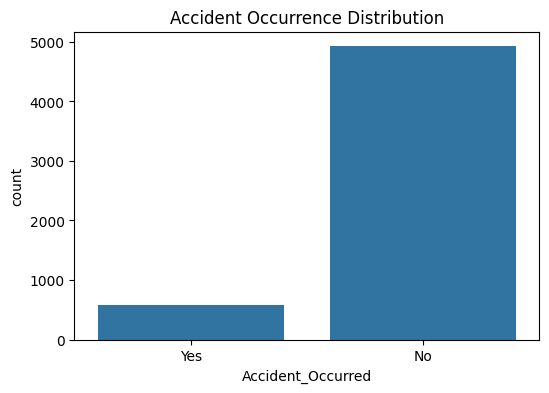

In [65]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Accident_Occurred', data=df_clean)
plt.title('Accident Occurrence Distribution')
plt.show()

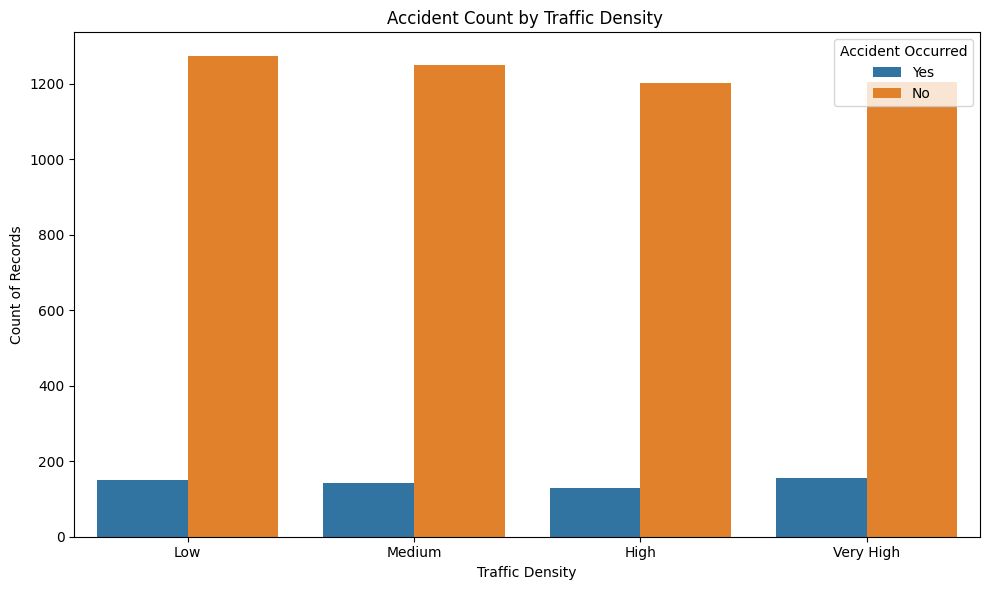

In [66]:
ACCIDENT_COLORS = ['#1f77b4', '#ff7f0e']
density_order = ['Low', 'Medium', 'High', 'Very High']

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Traffic_Density',
    hue='Accident_Occurred',
    order=density_order,
    palette=ACCIDENT_COLORS
)

plt.title('Accident Count by Traffic Density ')
plt.xlabel('Traffic Density')
plt.ylabel('Count of Records')
plt.legend(title='Accident Occurred')
plt.tight_layout()

/tmp/ipython-input-2831349312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


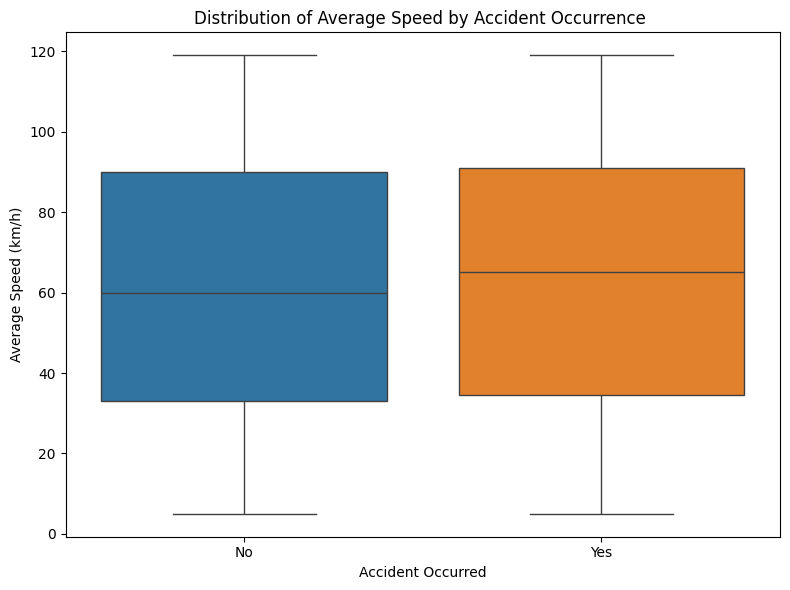

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Accident_Occurred',
    y='Avg_Speed(km/h)',
    palette=ACCIDENT_COLORS,
    order=['No', 'Yes']
)

plt.title('Distribution of Average Speed by Accident Occurrence ')
plt.xlabel('Accident Occurred')
plt.ylabel('Average Speed (km/h)')
plt.tight_layout()

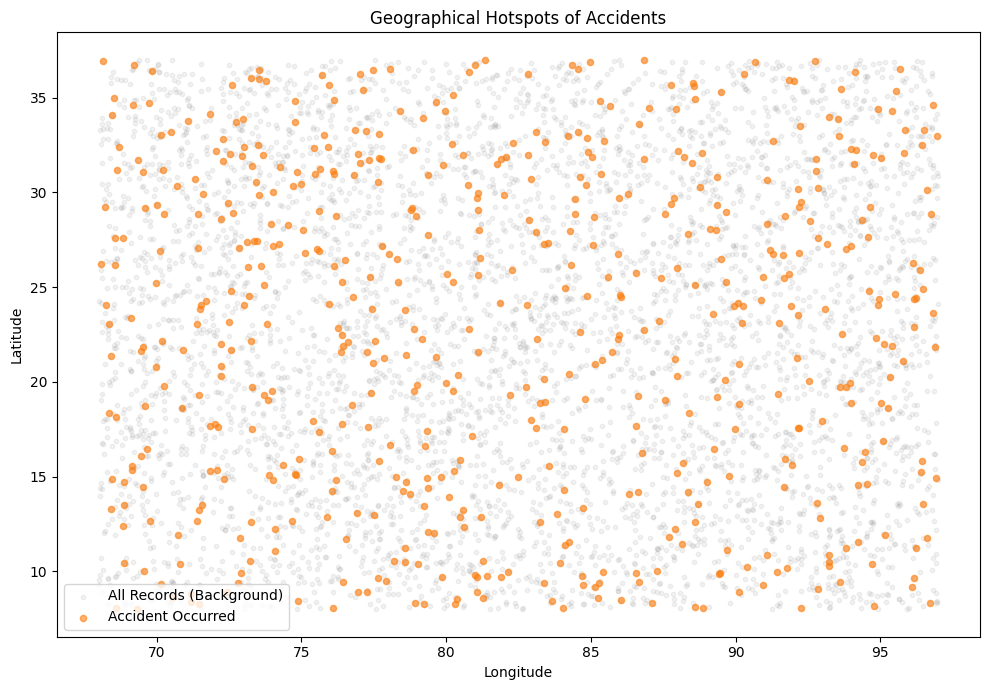

In [68]:
accident_df = df[df['Accident_Occurred'] == 'Yes']
ACCIDENT_COLOR_YES = '#ff7f0e'

plt.figure(figsize=(10, 7))

plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, color='gray', label='All Records (Background)', s=10)
plt.scatter(accident_df['Longitude'], accident_df['Latitude'], alpha=0.6, color=ACCIDENT_COLOR_YES, label='Accident Occurred', s=20)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Hotspots of Accidents')
plt.legend()
plt.tight_layout()